# P2.2 Practical Session - Heart Failure Prediction Dataset

## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

The kaggle datasets page can be found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data).



# Exploratory Data Analysis (EDA)

In [1]:
%pip install seaborn==0.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')


In [3]:
sns.__version__

'0.13.1'

In [4]:
# load the data
heart = pd.read_csv('https://raw.githubusercontent.com/strongway/tutorial_data_science/master/opendata/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [5]:
# see the shape of the data
heart.describe().T
# note this is only showing the numerical columns!!!

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


In [6]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
#catagorical variables
cat_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
#numeric variables
num_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']

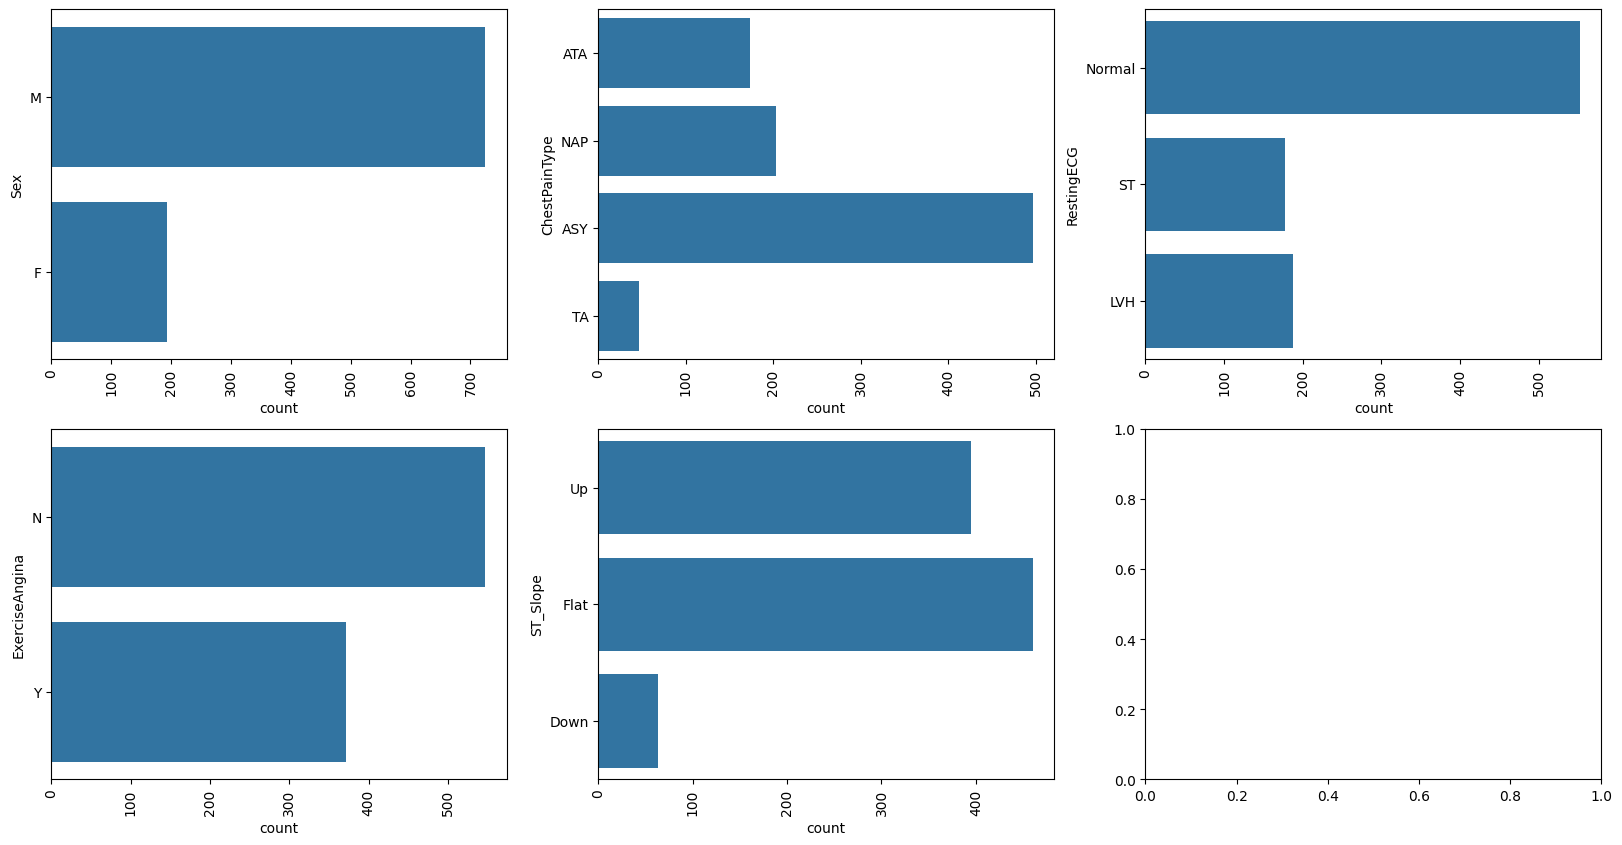

In [8]:
# visualize the percentage of HeartDisease for all the catagorical variables in subplots of 2x3
fig, ax = plt.subplots(2,3, figsize=(20,10))
for variable, subplot in zip(cat_vars, ax.flatten()):
    sns.countplot(heart[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Visualize the data to gain insights about the dataset.

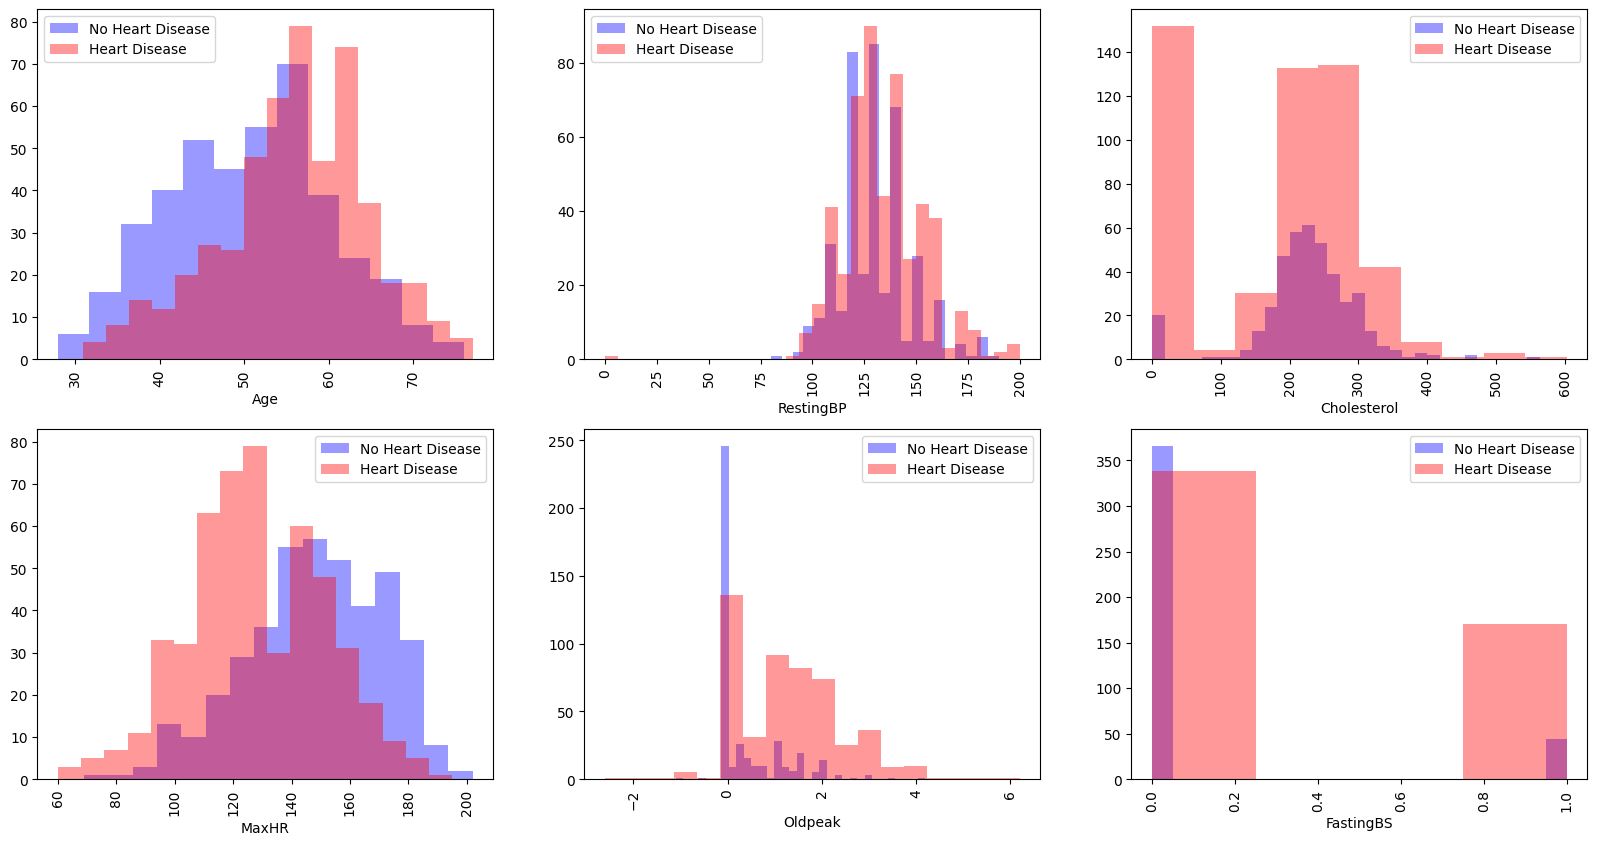

In [9]:
# for each num_vars, plot the histogram and distribution for HeartDisease = 0 and HeartDisease = 1
fig, ax = plt.subplots(2,3, figsize=(20,10))
for variable, subplot in zip(num_vars, ax.flatten()):
    sns.distplot(heart[heart['HeartDisease']==0][variable], ax=subplot, kde=False, color='blue', label='No Heart Disease')
    sns.distplot(heart[heart['HeartDisease']==1][variable], ax=subplot, kde=False, color='red', label='Heart Disease')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    subplot.legend()


**Discussion points: (Group Discussion)**

---


- What are the features that are most correlated with the target variable?


---

Your observations:

* Categorical variables:

1.
2.
3.

* Numerical variables:

1.
2.
3.




We need to recode the categorical variables into numerical variables. We first need to convert the categorical variables into dummy variables. We used the `get_dummies` function from `pandas` to do this. We then need to convert the dummy variables into numerical variables.

Note, if it is ordinal variable, you can use the `LabelEncoder` from `sklearn.preprocessing` to do this.

In [31]:
# we will keep the original data and make a copy to work with
# drop the first column aims to avoid multicollinearity
df = pd.get_dummies(heart, columns=cat_vars, drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.00,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.00,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.00,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.50,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.00,0,1,0,1,0,1,0,0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

**Question: what did get_dummies() function do to the categorical variables?**

Note:



# 1. Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

In this exercise, we will use the `LogisticRegression` from `sklearn.linear_model` to build a logistic regression model to predict the target variable.

Note, in psychology studies, usually we fit the model to all data. However, in machine learning, we need to split the data into training and testing sets. We will use the `train_test_split` from `sklearn.model_selection` to split the data into training and testing sets.

In [33]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((642, 15), (276, 15), (642,), (276,))

Now we can fit the model to the training data and predict the target variable for the testing data. We will use the `accuracy_score` from `sklearn.metrics` to calculate the accuracy of the model.

In [34]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# instantiate the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict on the test set
pred = logreg.predict(X_test)

# check the accuracy
print("Accuracy: ",'{0:.2%}'.format(accuracy_score(y_test, pred)))

Accuracy:  86.59%


Recall 'Confusion matrix'...

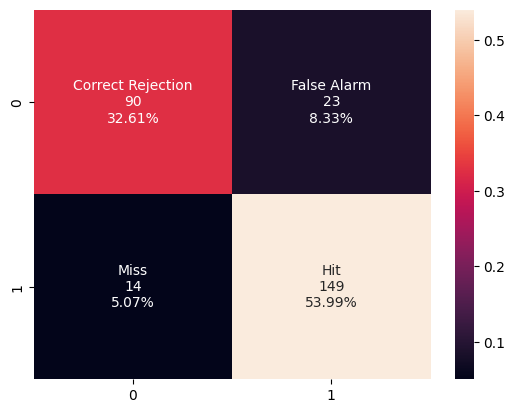

In [35]:
# Confusion Matrix (inspired by https://github.com/github-copilot/code_referencing?cursor=787a45f69a819d6608e6ca777da43cad&editor=vscode)
cm = confusion_matrix(y_test,pred)
names = ['Correct Rejection','False Alarm','Miss','Hit']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm/np.sum(cm), annot=labels, fmt='')
plt.show()


ROC_AUC Score :  90.73%


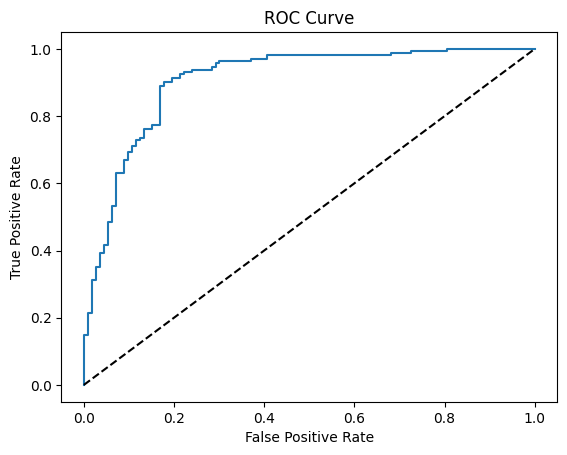

In [36]:
# Recall 'ROC Curve' and the area under the curve (AUC)
# Let's visualize this using roc_curve() function
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# print AUC
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, y_pred_prob)))

**Your task:**


---


Please vary the test size and random state, and fit the data again.

---



# Neural Network with Keras

The Keras tutorial can be found in [Datacamp here](https://campus.datacamp.com/courses/deep-learning-with-keras-in-python/). Basically Keras provide very simple steps to build ANN.

1. create a model, for example feedforwad  (sequential) model, e.g.,

`model = keras.models.Sequential()`

2. Add input layers and hidden layers, specifying the number of neurons with `Dense()`, and activation function, e.g.,

`model.add(Dense(10, input_shape = (2,), activation = 'relu')`

3. Add output layers, simply using `add()` with the number of neurons.

4. Comple the model with `.compile()` with given optimizer, often we choose 'adam' for this, and 'mse' for the loss function.

5. Fit your model to your data with `.fit()`


In [56]:
# we need Sequential and Dense function from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [38]:
# let's display the data again
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 15), (276, 15), (642,), (276,))

Let's try one-layer neural network, essentially the logistic regression.




In [51]:
# Create a simple feedback network
model = Sequential()
# specify the network, input 15, output 1, activation logistic sigmoid function
model.add(Dense(1, input_shape = (15,), activation = 'sigmoid', kernel_initializer='glorot_uniform'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 16        
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the dataset
model.fit(X_train, y_train, epochs=200, batch_size=20, verbose = 0)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

9/9 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8551
Accuracy: 85.51


In the next section, we try to fit with multiple layers. You need to fill the code, making it works.

In [68]:
# define the  model (not run)
# First to determine number of layers, and nodes
model = Sequential()
#model.add(Dense(_____, input_dim=____, activation='____'))
# ______
# ______
# Final layer
#model.add(Dense(1, activation='_____'))
#model.summary()

In [ ]:
# compile the model (not run)
model.compile(loss='____', optimizer='adam', metrics=['accuracy'])
# fit the model to the dataset
model.fit(X_train, y_train, epochs=____, batch_size=____, verbose = 0)


In [62]:

# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy of train: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of test: %.2f' % (accuracy*100))

21/21 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.9128
Accuracy of train: 91.28
9/9 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8587
Accuracy of test: 85.87


## Avoid overfitting
In the previous section, we have seen that the accuracy of the model on the training data is higher than the accuracy of the model on the testing data. This is a sign of overfitting. Overfitting occurs when the model is too complex relative to the amount and noisiness of the training data.

Dropout is a method used to improve the robustness of neural networks, introduced by Srivastava et al. in their 2014 paper titled "Dropout: A Simple Way to Prevent Neural Networks from Overfitting".

In dropout, during the training process, a random selection of neurons is temporarily excluded. These neurons are "dropped out," meaning they do not contribute to the activation of neurons that follow in the next layer during the forward pass, and their weights are not updated during the backward pass.

Neurons in a neural network typically adjust their weights as they learn, becoming specialized for certain features. This specialization leads to dependencies among neurons, where they rely heavily on specific patterns learned from the training data. This phenomenon, known as complex co-adaptations, can make the model overly specific to the training data and less effective at generalizing to new data.

By randomly dropping neurons during training, the network is forced to adapt, as other neurons have to compensate and learn to represent the information that the dropped neurons would have contributed. This process is thought to lead to the development of multiple, independent internal representations within the network, enhancing its ability to generalize to new data.


In [84]:
# define the  model
model = Sequential()
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                1024      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 1)               

In [85]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the dataset
model.fit(X_train, y_train, epochs=200, batch_size=64, verbose = 0)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy of train: %.2f' % (accuracy*100))
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of test: %.2f' % (accuracy*100))



21/21 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8006
Accuracy of train: 80.06
9/9 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8080
Accuracy of test: 80.80


9/9 [==============================] - 0s 2ms/step
ROC_AUC Score :  90.73%


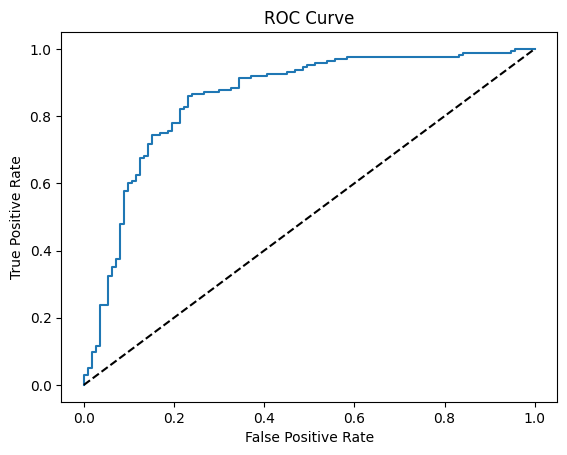

In [91]:
pred = model.predict(X_test)
# Let's visualize this using roc_curve() function
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# print AUC
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, y_pred_prob)))

# Support Vector Machines

Support Vector Machines (SVMs) are a powerful class of supervised machine learning algorithms used for classification and regression. At their core, SVMs seek to find the best boundary (or hyperplane) that separates classes of data in a high-dimensional space. This boundary is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors. SVMs are particularly effective in complex domains where the boundary between classes is not immediately obvious, and they can also be adapted to work with non-linearly separable data using a technique called the kernel trick, which maps the data into higher-dimensional space where a linear separator can be found.

From the [official website](https://scikit-learn.org/stable/modules/svm.html):
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).



In [71]:
from sklearn.svm import SVC

model_svc = SVC(kernel = 'linear', C = 0.1)

In [73]:
model_svc.fit(X_train, y_train)
pred = model_svc.predict(X_test)

# accuracy
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,pred)))

Accuracy :  86.23%


ROC_AUC Score :  90.73%


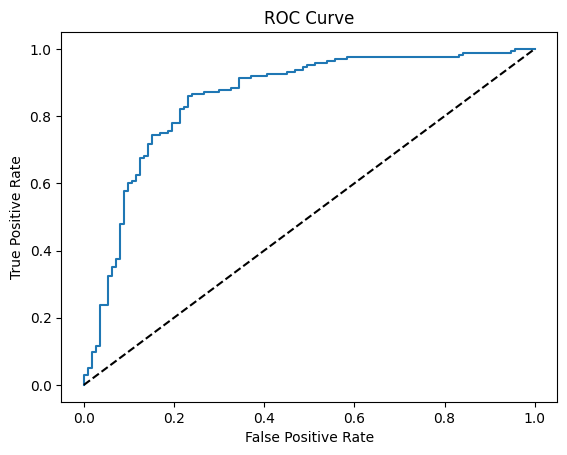

In [88]:
# Let's visualize this using roc_curve() function
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# print AUC
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, y_pred_prob)))